**KHAI BÁO THƯ VIÊN**




In [145]:
import pandas as pd #Đọc dữ liệu
import numpy as np #Xử lý dữ liệu
import matplotlib.pyplot as plt #Vẽ biểu đồ
import seaborn as sns #Vẽ biểu đồ thống kê.
import sklearn.datasets #Truy cập vào các tập dữ liệu mẫu có sẵn.
from sklearn.model_selection import train_test_split #Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.neighbors import KNeighborsClassifier #Mô hình phân loại k-nearest neighbors
from sklearn.preprocessing import MinMaxScaler #Tỉ lệ hóa dữ liệu
from sklearn.metrics import accuracy_score #Tính toán độ chính xác của mô hình phân loại
from sklearn.metrics import mean_squared_error #Tính toán giá trị bình phương trung bình của sai số
from sklearn.metrics import  r2_score #Tính toán điểm R^2 cho mô hình hồi quy
from sklearn.metrics import confusion_matrix #tính toán điểm R^2 cho mô hình hồi quy

In [146]:
#Tải tập dữ liệu về ung thư vú từ sklearn.datasets.
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [147]:
#Tạo một DataFrame từ dữ liệu tải về từ tập dữ liệu
df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [148]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [149]:
df.info() #Xác định kiểu dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [150]:
df.isna().sum() #Tổng các giá trị rỗng theo từng trường dữ liệu

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [151]:
df.shape #kích thước dữ liệu

(569, 30)

In [152]:
df.describe()#Mô tả dữ liệu

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [153]:
#Thêm cột target(chuẩn đoán)
df['target'] = breast_cancer_dataset.target


In [154]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [155]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

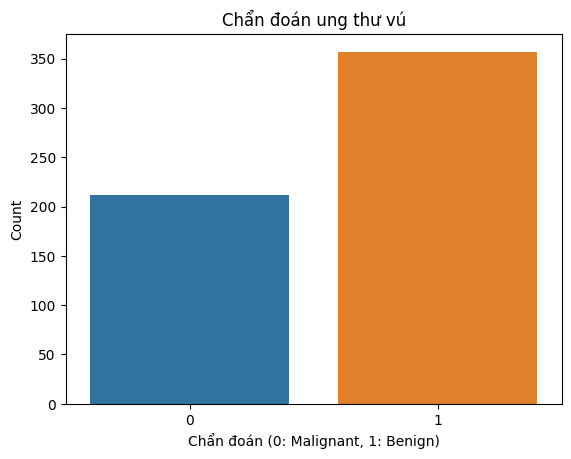

In [156]:
#1 --> Benign   (Lành tính)
#0 --> Malignant( Ác tính)
# Biểu đồ đếm số lượng bệnh lành tính hay ác tính
sns.countplot(x='target', data=df)
plt.xlabel('Chẩn đoán (0: Malignant, 1: Benign)')
plt.ylabel('Count')
plt.title('Chẩn đoán ung thư vú')
plt.show()

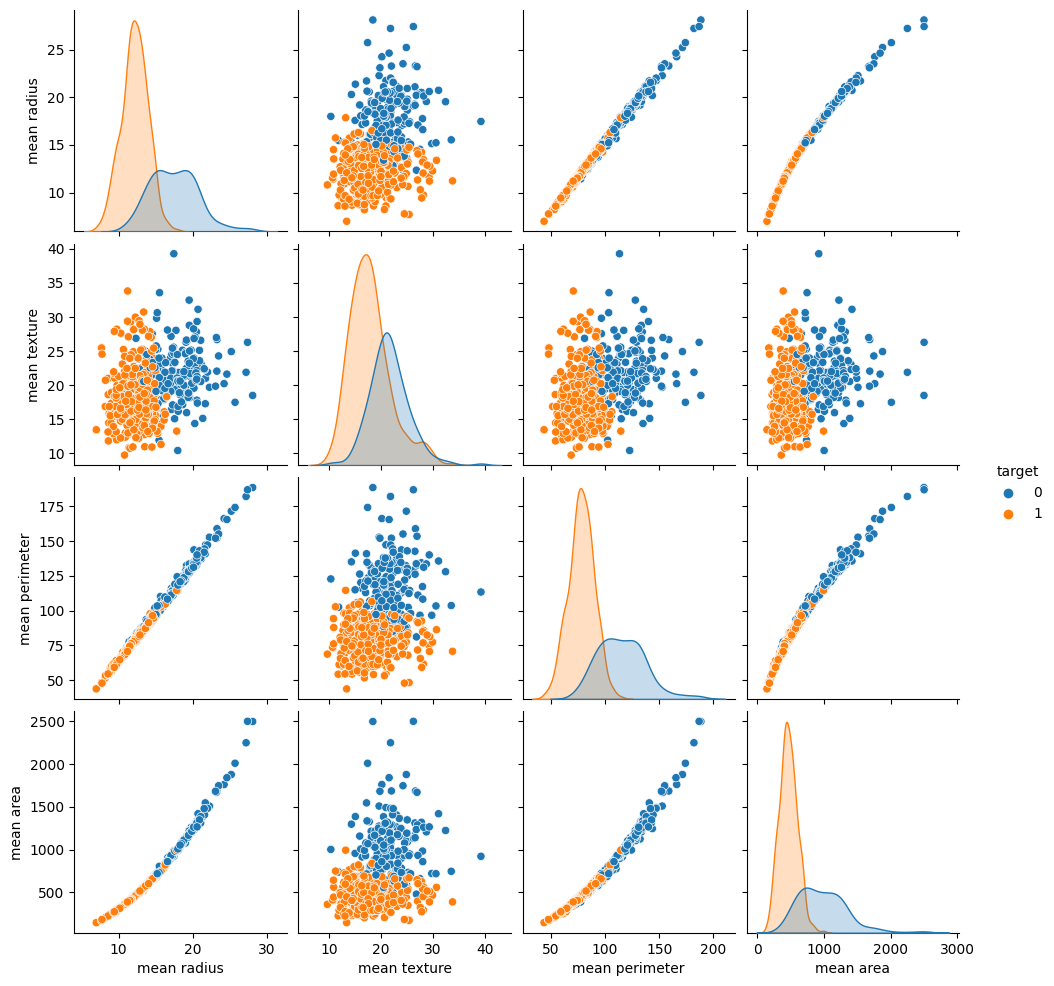

In [157]:
#Biểu đồ pairplot hiển thị sự tương quan giữa các cặp biến trong tập dữ liệu
cols = ["target", "mean radius","mean texture", "mean perimeter", "mean area"]
sns.pairplot(df[cols], hue="target")
plt.show()

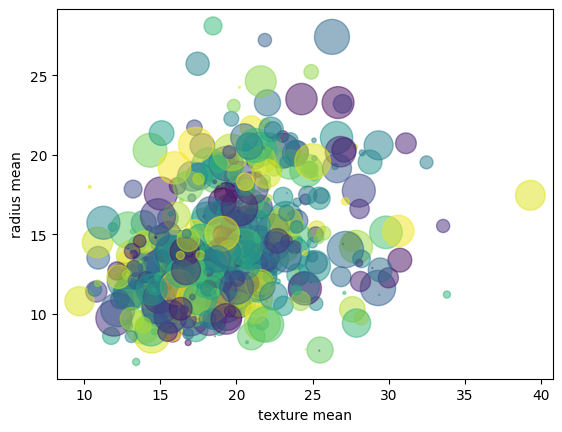

In [158]:
#Biểu đồ scatter plot hiển thị mối quan hệ giữa hai biến 'mean texture' và 'mean radius'
size = len(df['mean texture'])
area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )
plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(df['mean texture'], df['mean radius'], s=area, c=colors, alpha=0.5);

In [159]:
X = df.drop(columns='target', axis=1)
Y = df['target']

In [160]:
print(X)
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [161]:
# tạo tệp huấn luyện train và chia tệp dữ liệu train theo tỉ lệ
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)


In [162]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("Y_train",len(Y_train))
print("Y_test",len(Y_test))

X_train 455
X_test 114
Y_train 455
Y_test 114


In [163]:
# tạo bộ chia tỷ lệ
scaler = MinMaxScaler()

# Điều chỉnh và biến đổi tập huấn luyện
X_train_scaled = scaler.fit_transform(X_train)

# Chuyển đổi tập
X_test_scaled = scaler.transform(X_test)

In [164]:
import warnings
warnings.filterwarnings("ignore")

k_values = range(1, 30)
for k in k_values:
  #Tạo một đối tượng KNeighborsClassifier với số lượng là k
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train_scaled, Y_train)
  # Dự đoán tập test
  y_pred = knn.predict(X_test_scaled)

  #Tính ma trận nhầm lẫn(confusion matrix)
  cm = confusion_matrix(Y_test, y_pred)
  #Tính độ chính xác (acc)
  acc = accuracy_score(Y_test, y_pred)
  #Tính điểm số (score) của mô hình KNN
  score = knn.score(X_test, Y_test)
  #Kết quả RMSE
  rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

  print(f"k = {k}, RMSE = {rmse:.4f}")
  print("Score : ", score)  
  print("Độ chính xác KNN cơ bản : ", acc)
  print(cm)
  print("======================")

k = 1, RMSE = 0.2649
Score :  0.3684210526315789
Độ chính xác KNN cơ bản :  0.9298245614035088
[[37  5]
 [ 3 69]]
k = 2, RMSE = 0.2094
Score :  0.3684210526315789
Độ chính xác KNN cơ bản :  0.956140350877193
[[40  2]
 [ 3 69]]
k = 3, RMSE = 0.2649
Score :  0.3684210526315789
Độ chính xác KNN cơ bản :  0.9298245614035088
[[37  5]
 [ 3 69]]
k = 4, RMSE = 0.2649
Score :  0.3684210526315789
Độ chính xác KNN cơ bản :  0.9298245614035088
[[37  5]
 [ 3 69]]
k = 5, RMSE = 0.2294
Score :  0.3684210526315789
Độ chính xác KNN cơ bản :  0.9473684210526315
[[37  5]
 [ 1 71]]
k = 6, RMSE = 0.2649
Score :  0.3684210526315789
Độ chính xác KNN cơ bản :  0.9298245614035088
[[37  5]
 [ 3 69]]
k = 7, RMSE = 0.2294
Score :  0.3684210526315789
Độ chính xác KNN cơ bản :  0.9473684210526315
[[37  5]
 [ 1 71]]
k = 8, RMSE = 0.2478
Score :  0.3684210526315789
Độ chính xác KNN cơ bản :  0.9385964912280702
[[37  5]
 [ 2 70]]
k = 9, RMSE = 0.2294
Score :  0.3684210526315789
Độ chính xác KNN cơ bản :  0.94736842105

In [165]:
# Tạo k giá trị cho k-NN
k_values = range(1, 30)

# Tạo vòng lập
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)
    
    # Dự đoán tập test
    y_pred = knn.predict(X_test_scaled)
    
    # Kết quả MSE, RMSE, R2-score
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, y_pred)

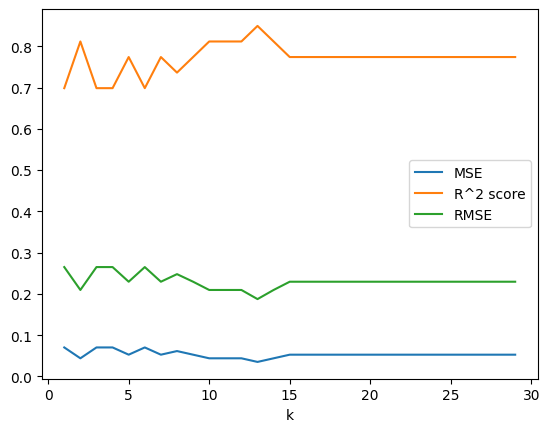

In [174]:
# Tạo danh sách 
rmse_values = []
r2_values = []
mse_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)
    
    # Dự đoán trên tập test
    y_pred = knn.predict(X_test_scaled)
    
    # Kết quả RMSE, R2-score
    mse_values.append(mean_squared_error(Y_test, y_pred))
    r2_values.append(r2_score(Y_test, y_pred))
    rmse_values.append(np.sqrt(mean_squared_error(Y_test, y_pred)))

# Vẽ biểu đồ
plt.plot(k_values, mse_values, label='MSE')
plt.plot(k_values, r2_values, label='R^2 score')
plt.plot(k_values, rmse_values, label='RMSE')
plt.xlabel('k')
plt.legend()
plt.show()


**Ứng dụng thực tế**

In [167]:
model = KNeighborsClassifier()

In [168]:
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [169]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [170]:
print('Độ chính xác trên dữ liệu huấn luyện = ', training_data_accuracy)

Độ chính xác trên dữ liệu huấn luyện =  0.9472527472527472


In [171]:
# độ chính xác trên dữ liệu thử nghiệm
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [172]:
print('Độ chính xác trên dữ liệu thử nghiệm = ', test_data_accuracy)

Độ chính xác trên dữ liệu thử nghiệm =  0.9385964912280702


In [173]:
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,
              0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

# thay đổi dữ liệu đầu vào thành mảng numpy
input_data_as_numpy_array = np.asarray(input_data)

# định hình lại mảng numpy như chúng ta đang dự đoán cho một điểm dữ liệu
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print('Kết quả đưa ra là: ', prediction)

if (prediction[0] == 0):
  print('Chẩn đoán: Ung thư vú là ÁC tính')

else:
  print('Chẩn đoán: Ung thư vú là LÀNH tính')

Kết quả đưa ra là:  [1]
Chẩn đoán: Ung thư vú là LÀNH tính
